# Global Air Pollution analysis  with OpenAQ dataset
The source of this dataset is [OpenAQ community](https://openaq.org). Their mission is to fight air inequality by opening up air quality data and connecting a diverse global, grassroots community of individuals and organizations.  

OpenAQ aggregates data with the help of different public sources provided by government, research-grade and other sources. They do not validate or transform data. In most cases, their real-time data have not undergone quality assurance or control processes by originating sources.

OpenAQ collects data in 64 different countries. Their aggregate PM2.5, PM10, ozone (O3), sulfur dioxide (SO2), nitrogen dioxide (NO2), carbon monoxide (CO), and black carbon (BC) information. There are two units of measurement: ppm and µg/m³. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import bq_helper
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
open_aq = bq_helper.BigQueryHelper(active_project='bigquery-public-data', 
                                  dataset_name='openaq')
open_aq.list_tables()

['global_air_quality']

In [3]:
open_aq.table_schema('global_air_quality')

[SchemaField('location', 'string', 'NULLABLE', 'Location where data was measured', ()),
 SchemaField('city', 'string', 'NULLABLE', 'City containing location', ()),
 SchemaField('country', 'string', 'NULLABLE', 'Country containing measurement in 2 letter ISO code', ()),
 SchemaField('pollutant', 'string', 'NULLABLE', 'Name of the Pollutant being measured. Allowed values: PM25, PM10, SO2, NO2, O3, CO, BC', ()),
 SchemaField('value', 'float', 'NULLABLE', 'Latest measured value for the pollutant', ()),
 SchemaField('timestamp', 'timestamp', 'NULLABLE', 'The datetime at which the pollutant was measured, in ISO 8601 format', ()),
 SchemaField('unit', 'string', 'NULLABLE', 'The unit the value was measured in coded by UCUM Code', ()),
 SchemaField('source_name', 'string', 'NULLABLE', 'Name of the source of the data', ()),
 SchemaField('latitude', 'float', 'NULLABLE', 'Latitude in decimal degrees. Precision >3 decimal points.', ()),
 SchemaField('longitude', 'float', 'NULLABLE', 'Longitude in d

In [4]:
open_aq.head('global_air_quality')

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Mobile_Cle Elum,037,US,pm25,0.00,2017-09-26 20:00:00+00:00,µg/m³,AirNow,47.197630,-120.958230,1.0
1,Mobile_WhiteSalmon,039,US,pm25,0.00,2017-09-26 20:00:00+00:00,µg/m³,AirNow,45.732414,-121.492330,1.0
2,Mobile_Newport,051,US,pm25,0.00,2017-09-21 18:00:00+00:00,µg/m³,AirNow,48.186485,-117.049160,1.0
3,FR20047,Ain,FR,pm10,49.63,2018-02-28 11:00:00+00:00,µg/m³,EEA France,45.823223,4.953958,1.0
4,FR20047,Ain,FR,no2,40.85,2018-02-28 18:00:00+00:00,µg/m³,EEA France,45.823223,4.953958,1.0


In [5]:
query = """
        SELECT unit, COUNT(pollutant) as value
        FROM `bigquery-public-data.openaq.global_air_quality`
        GROUP BY unit
"""

open_aq.estimate_query_size(query)

0.00021166633814573288

In [6]:
unit_distribution = open_aq.query_to_pandas_safe(query)
print(unit_distribution)


    unit  value
0  µg/m³  13829
1    ppm   3338


Text(0.5,1,'Unit distribution')

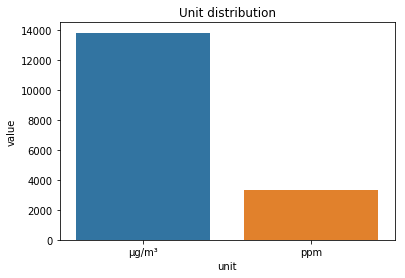

In [7]:
sns.barplot(x='unit',y='value',data=unit_distribution)
plt.title('Unit distribution')

Most of the observations are in the metric system.

In [8]:
query = """
        SELECT COUNT(unit) as ppm_observation, pollutant
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE unit = 'ppm'
        GROUP BY pollutant
        
"""
open_aq.estimate_query_size(query)

0.00021166633814573288

In [9]:
pollutant_unit_ppm = open_aq.query_to_pandas_safe(query)
print(pollutant_unit_ppm)

   ppm_observation pollutant
0              564       so2
1              599       no2
2             1690        o3
3              485        co


Text(0.5,1,'PPM unit distribution')

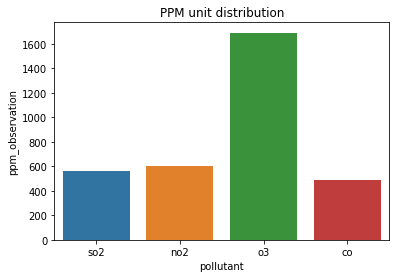

In [10]:
sns.barplot(x='pollutant',y='ppm_observation', data=pollutant_unit_ppm)
plt.title('PPM unit distribution')

In [11]:
query = """
        SELECT COUNT(unit) as mcubic_observation, pollutant
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE unit != 'ppm'
        GROUP BY pollutant
"""
open_aq.estimate_query_size(query)

0.00021166633814573288

In [12]:
pollutant_unit_mg3 = open_aq.query_to_pandas_safe(query)
print(pollutant_unit_mg3)

   mcubic_observation pollutant
0                2445      pm25
1                3241      pm10
2                3230       no2
3                2313        o3
4                1691       so2
5                 893        co
6                  16        bc


Text(0.5,1,'µg/m³ unit distribution')

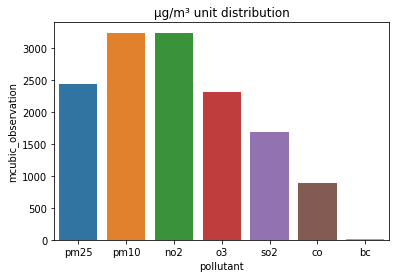

In [13]:
sns.barplot(x='pollutant',y='mcubic_observation',data=pollutant_unit_mg3)
plt.title('µg/m³ unit distribution')

In [14]:
query = """
        SELECT COUNT(unit) as number_of_observations, pollutant
        FROM `bigquery-public-data.openaq.global_air_quality`
        GROUP BY pollutant
"""

open_aq.estimate_query_size(query)

0.00021166633814573288

In [15]:
number_of_observ = open_aq.query_to_pandas_safe(query)

Text(0.5,1,'Total number of observations')

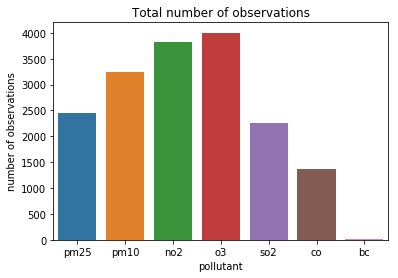

In [16]:
sns.barplot(x='pollutant',y='number_of_observations',data=number_of_observ)
plt.xlabel('pollutant')
plt.ylabel('number of observations')
plt.title('Total number of observations')

The number of 'Black Carbon' observations are too low for analysis.  
PM2.5 and PM10 are only in the metric system. Other pollutants are ppm/µg/m³ mix.

**Particulate matter(PM) air pollution **  
[Source](http://www.environment.gov.au/resource/particles)  
Airborne particles are sometimes referred to as 'particulate matter' or 'PM'. They include dust, dirt, soot, smoke, and liquid droplets. Some particles are large enough or dark enough to be seen as soot or smoke, while others are so small they can only be detected individually with a microscope.

Some particles are emitted directly into the air from a variety of sources that are either natural or related to human activity. Natural sources include bushfires, dust storms, pollens and sea spray. Those related to human activity include motor vehicle emissions, industrial processes (eg electricity generation, incinerators and stone crushing), unpaved roads and woodheaters.

Particles can be classified on the basis of their size, referred to as their 'aerodynamic diameter'. 'Coarse particles' are those between 10 and 2.5 micrometres (µm) in diameter; 'fine particles' are smaller than 2.5 µm; and 'ultrafine particles' are smaller than 0.1 µm

In [17]:
query = """
        SELECT AVG(value) as Average, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'pm25' and value > 0
        GROUP BY country
        ORDER BY Average
"""
open_aq.estimate_query_size(query)

0.0002720654010772705

In [18]:
pm25_country_pollution = open_aq.query_to_pandas_safe(query)

Text(0.5,1,'Average PM 2.5 air pollution by country(µg/m³)')

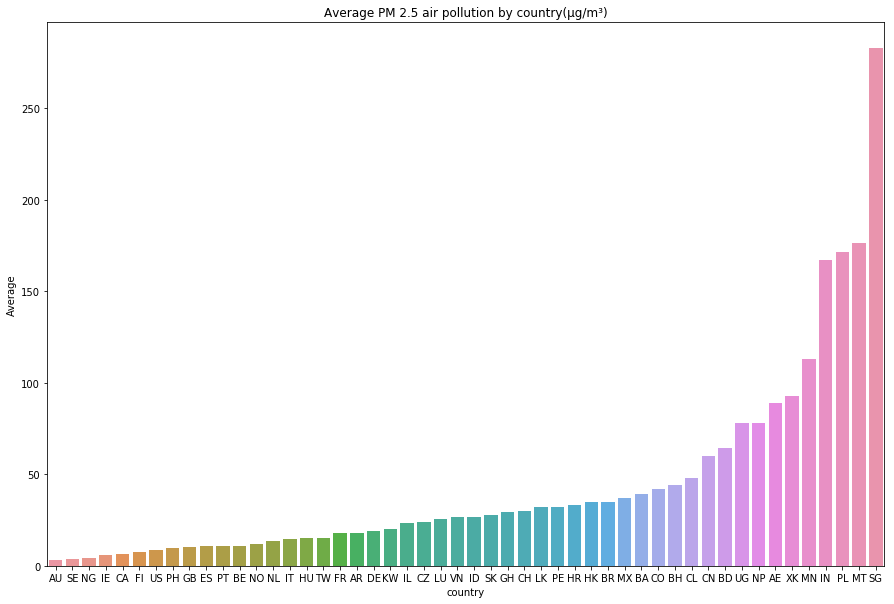

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y=pm25_country_pollution['Average'],x=pm25_country_pollution['country'])
plt.title('Average PM 2.5 air pollution by country(µg/m³)')

Singapore, Malta, Poland, India have the highest value. Let's check Singapore data more closely because it's extremely high.

In [20]:
query = """
    SELECT value, unit, pollutant, country
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = 'SG' and pollutant = 'pm25' and value > 0
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [21]:
sg_pm25_dist = open_aq.query_to_pandas_safe(query)

In [22]:
sg_pm25_dist

,value,unit,pollutant,country
0,282.9,µg/m³,pm25,SG


There is only one entry for Singapore. We should ignore its data.

In [23]:
query = """
        SELECT AVG(value) as Average, city, latitude, longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'pm25' and value > 0
        GROUP BY city, latitude, longitude
"""
open_aq.estimate_query_size(query)

0.0007053343579173088

In [24]:
pm25_map = open_aq.query_to_pandas_safe(query)

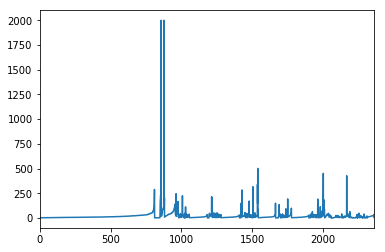

In [25]:
pm25_map['Average'].plot()

In [26]:
outliers = pm25_map[pm25_map['Average'] > 1500]
outliers

,Average,city,latitude,longitude
857,1999.0,Aysén,-45.40680,-72.69626
878,2000.0,Chennai,13.08784,80.27847


Highly suspectable numbers. We will drop them.

In [27]:
pm25_map = pm25_map.drop(pm25_map.index[pm25_map['Average'] > 1500])

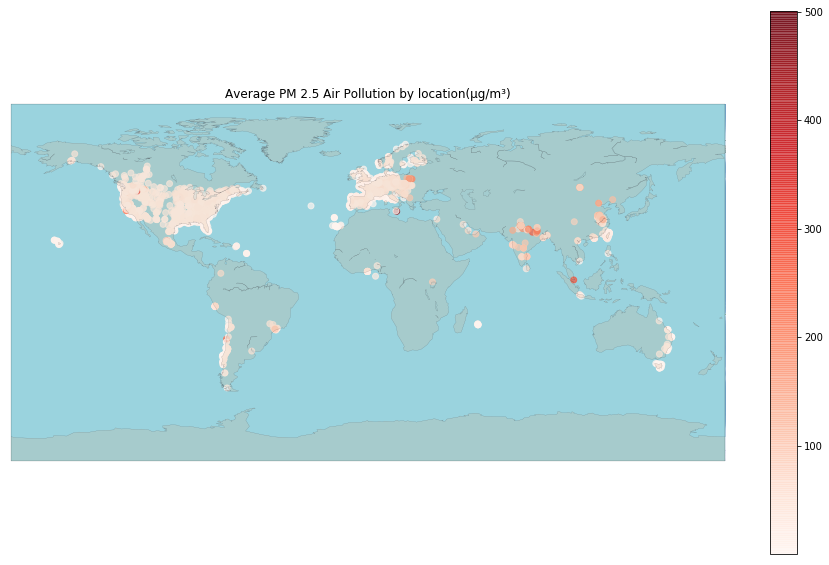

In [28]:
fig = plt.figure(figsize=(16,10))
bmap = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90,urcrnrlat=90,
                resolution='c', lat_ts=True)
bmap.shadedrelief()
bmap.drawmapboundary(fill_color='#9ad3de', linewidth=0.1)
bmap.fillcontinents(color='#daad86', alpha=0.2)
bmap.drawcoastlines(linewidth=0.1, color='#312c32')

bmap.scatter(pm25_map['longitude'],pm25_map['latitude'],c=pm25_map['Average'],alpha=0.7,cmap='Reds')
plt.title('Average PM 2.5 Air Pollution by location(µg/m³)')
plt.colorbar()

In [29]:
query = """
        SELECT AVG(value) as Average, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'pm10' and value > 0
        GROUP BY country
        ORDER BY Average
"""
open_aq.estimate_query_size(query)

0.0002720654010772705

In [30]:
pm10_country_pollution = open_aq.query_to_pandas_safe(query)

Text(0.5,1,'Average PM 10 air pollution by country(µg/m³)')

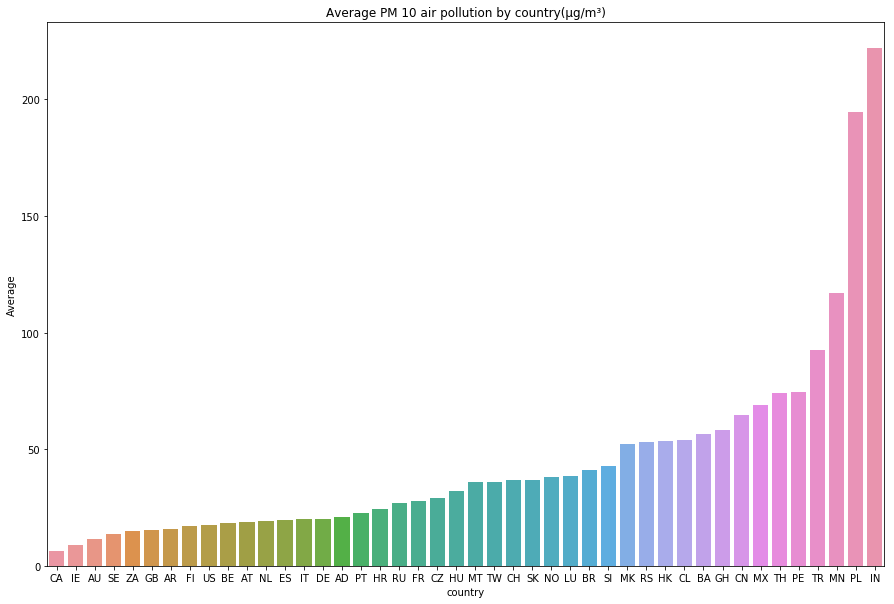

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y=pm10_country_pollution['Average'],x=pm10_country_pollution['country'])
plt.title('Average PM 10 air pollution by country(µg/m³)')

India, Poland and Mongolia have the highest value.

In [32]:
query = """
        SELECT AVG(value) as Average, city, latitude, longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'pm10' and value > 0
        GROUP BY city, latitude, longitude
"""
open_aq.estimate_query_size(query)

0.0007053343579173088

In [33]:
pm10_map = open_aq.query_to_pandas_safe(query)

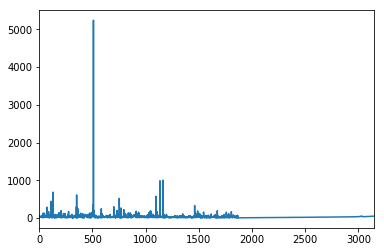

In [34]:
pm10_map['Average'].plot()

In [35]:
outliers = pm10_map[pm10_map['Average'] > 1500]
outliers

,Average,city,latitude,longitude
509,5243.0,Kocaeli,40.78873,29.537188


In [36]:
pm10_map = pm10_map.drop(pm10_map.index[pm10_map['Average'] > 1500])

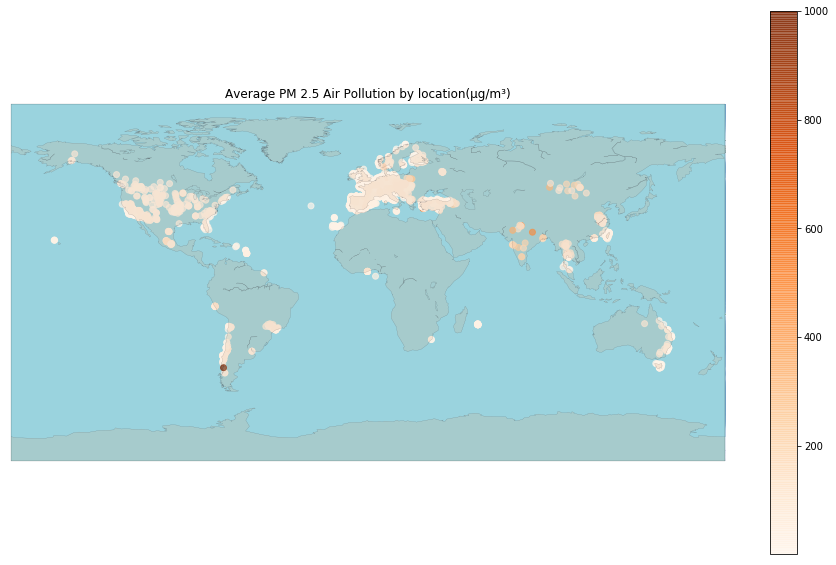

In [37]:
fig = plt.figure(figsize=(16,10))
bmap = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90,urcrnrlat=90,
                resolution='c', lat_ts=True)
bmap.shadedrelief()
bmap.drawmapboundary(fill_color='#9ad3de', linewidth=0.1)
bmap.fillcontinents(color='#daad86', alpha=0.2)
bmap.drawcoastlines(linewidth=0.1, color='#312c32')

bmap.scatter(pm10_map['longitude'],pm10_map['latitude'],c=pm10_map['Average'],alpha=0.7,cmap='Oranges')
plt.title('Average PM 2.5 Air Pollution by location(µg/m³)')
plt.colorbar()

For other pollutants we need to convert ppm to µg/m³ units.  
  
![conversion formula](https://www.markes.com/uploaded/image/Technical/Unit-conversion_new1.jpg)

A common set of conditions for molar volume at 1 atm and 25°C is 24.45 L for all gases.  
[About molar volume of gases](http://nobel.scas.bcit.ca/wiki/index.php/Molar_volume_of_a_gas)

In [38]:
#molecular weight for pollutants
molar_volume_const = 24.45
NO2_mol_weight = 46.00550
o3_mol_weight = 48
so2_mol_weight = 64.066
co_mol_weight = 28.01
# conversion check
# http://www.aresok.org/npg/nioshdbs/calc.htm  
# https://www.metric-conversions.org/weight/milligrams-to-micrograms.htm

In [39]:
#function for converting ppm to µg/m³
def gas_convertion(ppm_unit, mol_mass):
    return (ppm_unit * mol_mass / molar_volume_const) / 0.001

**Nitrogen dioxide (NO2)**  
[Source](http://www.environment.gov.au/protection/publications/factsheet-nitrogen-dioxide-no2)  
Nitrogen dioxide is a nasty-smelling gas. Some nitrogen dioxide is formed naturally in the atmosphere by lightning and some is produced by plants, soil and water. However, only about 1% of the total amount of nitrogen dioxide found in our cities' air is formed this way.

Nitrogen dioxide is an important air pollutant because it contributes to the formation of photochemical smog, which can have significant impacts on human health.

The major source of nitrogen dioxide is the burning of fossil fuels: coal, oil and gas. Most of the nitrogen dioxide in cities comes from motor vehicle exhaust (about 80%). Other sources of nitrogen dioxide are petrol and metal refining, electricity generation from coal-fired power stations, other manufacturing industries and food processing.

In [40]:
query = """
        SELECT AVG(value) as Average, unit, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'no2' and value > 0
        GROUP BY country, unit
        ORDER BY Average
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [41]:
no2_country_pollution = open_aq.query_to_pandas_safe(query)

In [42]:
no2_country_pollution

,Average,unit,country
0,0.006029,ppm,AU
1,0.011917,ppm,CA
2,0.012562,ppm,US
3,0.014048,ppm,TW
4,0.014126,ppm,IL
5,0.017447,ppm,TH
6,0.019733,ppm,PE
7,0.021500,ppm,AR
8,0.029583,ppm,MX
9,1.648571,µg/m³,DK


In [43]:
#same counties that have diffrent units
print(no2_country_pollution[no2_country_pollution['country'].duplicated(keep=False)])

      Average   unit country
2    0.012562    ppm      US
6    0.019733    ppm      PE
15  16.858333  µg/m³      PE
43  43.000000  µg/m³      US


In [44]:
#converting units
no2_country_pollution['Average'] = no2_country_pollution.apply(lambda x: gas_convertion(x['Average'], NO2_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)
print(no2_country_pollution)

       Average   unit country
0    11.344161    ppm      AU
1    22.422585    ppm      CA
2    23.636194    ppm      US
3    26.433033    ppm      TW
4    26.579753    ppm      IL
5    32.828186    ppm      TH
6    37.130547    ppm      PE
7    40.454734    ppm      AR
8    55.664460    ppm      MX
9     1.648571  µg/m³      DK
10    8.606250  µg/m³      LT
11   10.519047  µg/m³      IE
12   11.940759  µg/m³      LV
13   14.100000  µg/m³      MT
14   15.375000  µg/m³      IT
15   16.858333  µg/m³      PE
16   17.057851  µg/m³      ES
17   17.599556  µg/m³      NL
18   18.645833  µg/m³      BE
19   18.804000  µg/m³      HR
20   20.133871  µg/m³      CZ
21   20.929854  µg/m³      FI
22   21.769650  µg/m³      MK
23   22.748899  µg/m³      SE
24   23.200000  µg/m³      GI
25   23.238095  µg/m³      GB
26   23.828571  µg/m³      LU
27   24.010070  µg/m³      SK
28   24.258387  µg/m³      CL
29   24.385714  µg/m³      BA
30   24.803346  µg/m³      FR
31   25.465552  µg/m³      HU
32   26.50

In [45]:
no2_country_pollution = no2_country_pollution.groupby('country', as_index=False).mean().sort_values(by='Average',axis=0)


Text(0.5,1,'Average NO2 air pollution by country(µg/m³)')

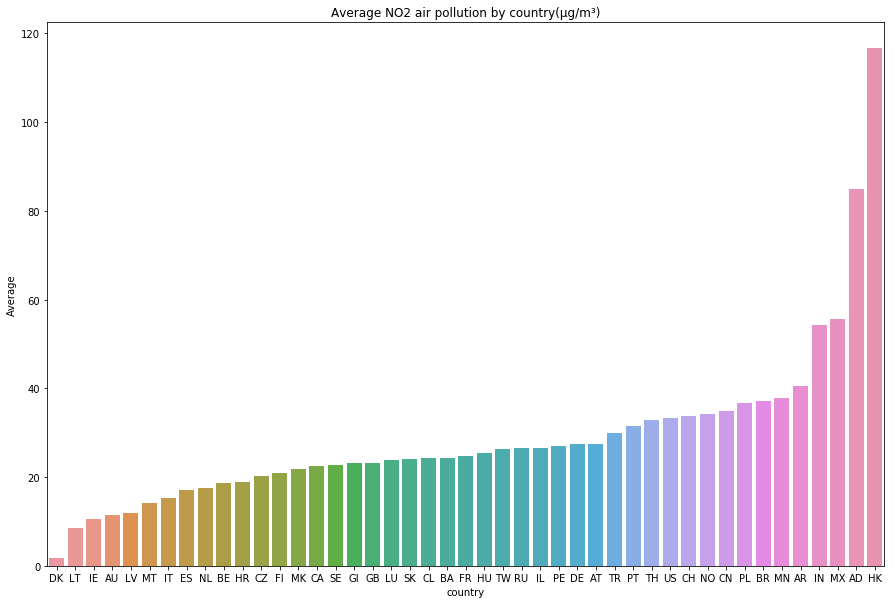

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y=no2_country_pollution['Average'],x=no2_country_pollution['country'])
plt.title('Average NO2 air pollution by country(µg/m³)')

Hong Kong has the highest value. Although data seems unreliable in this case too, quick search shows very high values of NO2 with average of 100 µg/m³  
[Quick look at air quality](http://www.hongkongcan.org/hk/article/no-improvement-in-hong-kongs-no2-reduction-for-nearly-two-decades/)  
[Real-time Air quality index](http://aqicn.org/city/hongkong/)


In [47]:
query = """
        SELECT AVG(value) as Average, unit, city, latitude, longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'no2' and value > 0
        GROUP BY city, unit, latitude, longitude
"""
open_aq.estimate_query_size(query)

0.0008367914706468582

In [48]:
no2_map = open_aq.query_to_pandas_safe(query)

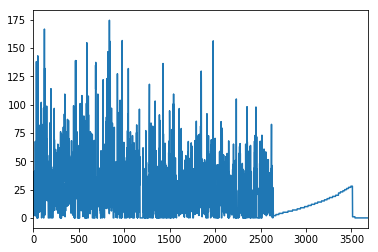

In [49]:
no2_map['Average'].plot()

In [50]:
no2_map['Average'] = no2_map.apply(lambda x: gas_convertion(x['Average'], NO2_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)

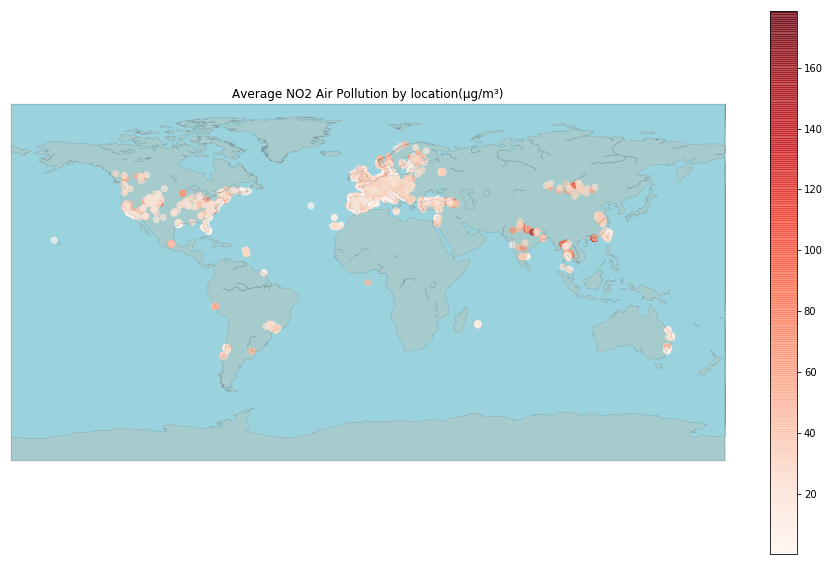

In [51]:
fig = plt.figure(figsize=(16,10))
bmap = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90,urcrnrlat=90,
                resolution='c', lat_ts=True)
bmap.shadedrelief()
bmap.drawmapboundary(fill_color='#9ad3de', linewidth=0.1)
bmap.fillcontinents(color='#daad86', alpha=0.2)
bmap.drawcoastlines(linewidth=0.1, color='#312c32')

bmap.scatter(no2_map['longitude'],no2_map['latitude'],c=no2_map['Average'],alpha=0.7,cmap='Reds')
plt.title('Average NO2 Air Pollution by location(µg/m³)')
plt.colorbar()

**Ground-level ozone (O3)**  
[Source](http://www.environment.gov.au/protection/publications/factsheet-ground-level-ozone-o3)  
Ozone is a gas that is formed when nitrogen oxides react with a group of air pollutants known as 'reactive organic substances' in the presence of sunlight.  The chemicals that react to form ozone come from sources such as: motor vehicle exhaust, oil refining, printing, petrochemicals, lawn mowing, aviation, bushfires and burning off. Motor vehicle exhaust fumes produce as much as 70% of the nitrogen oxides and 50% of the organic chemicals that form ozone.  

The natural amount of ozone in the lower atmosphere is generally around 0.04 parts per million (ppm), and that amount is not harmful to human health. 

In [52]:
query = """
        SELECT AVG(value) as Average, unit, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'o3' and value > 0
        GROUP BY country, unit
        ORDER BY Average
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [53]:
o3_country_pollution = open_aq.query_to_pandas_safe(query)

In [54]:
o3_country_pollution

,Average,unit,country
0,0.007983,ppm,PE
1,0.012567,ppm,AU
2,0.018109,ppm,TH
3,0.024231,ppm,IL
4,0.026500,ppm,MX
5,0.027027,ppm,TW
6,0.028690,ppm,US
7,0.029000,ppm,BH
8,0.029536,ppm,CA
9,0.038000,ppm,AE


In [55]:
print(o3_country_pollution[o3_country_pollution['country'].duplicated(keep=False)])

       Average   unit country
0     0.007983    ppm      PE
10    0.038000    ppm      CL
13    8.156667  µg/m³      PE
48  100.470968  µg/m³      CL


In [56]:
o3_country_pollution['Average'] = o3_country_pollution.apply(lambda x: gas_convertion(x['Average'], o3_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)
o3_country_pollution = o3_country_pollution.groupby('country', as_index=False).mean().sort_values(by='Average',axis=0)

Text(0.5,1,'Average O3 air pollution by country(µg/m³)')

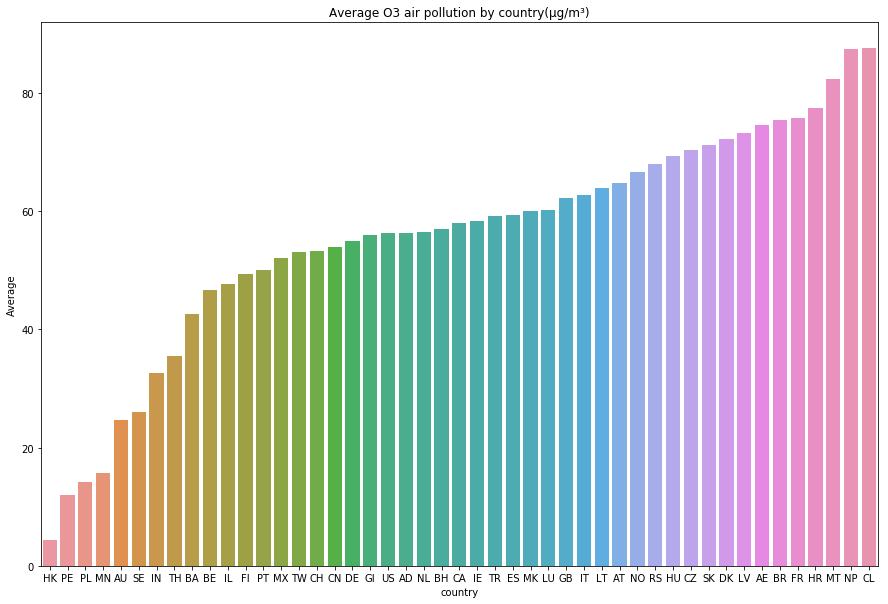

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y=o3_country_pollution['Average'],x=o3_country_pollution['country'])
plt.title('Average O3 air pollution by country(µg/m³)')

Nepal and Malta have the highest value. It's interesting that countries with low ozone levels have high values with other air pollutants.

In [58]:
query = """
        SELECT AVG(value) as Average, unit, city, latitude, longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'o3' and value >= 0
        GROUP BY city, unit, latitude, longitude
"""
open_aq.estimate_query_size(query)

0.0008367914706468582

In [59]:
o3_map = open_aq.query_to_pandas_safe(query)

In [60]:
o3_map['Average'] = o3_map.apply(lambda x: gas_convertion(x['Average'], o3_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)

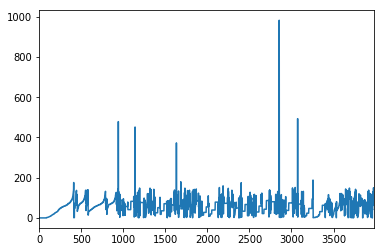

In [61]:
o3_map['Average'].plot()

In [62]:
outliers = o3_map[o3_map['Average'] > 300]
outliers

,Average,unit,city,latitude,longitude
940,479.000000,µg/m³,Karabük,41.179740,32.630978
1139,452.170000,µg/m³,Coronel,-36.983803,-73.159775
1631,373.006135,ppm,Nonthaburi,13.907827,100.535650
2854,983.100000,µg/m³,Llayllay,-32.833637,-70.996930
3073,493.720000,µg/m³,Coronel,-37.031700,-73.138690


In [63]:
o3_map = o3_map.drop(o3_map.index[o3_map['Average'] > 300])

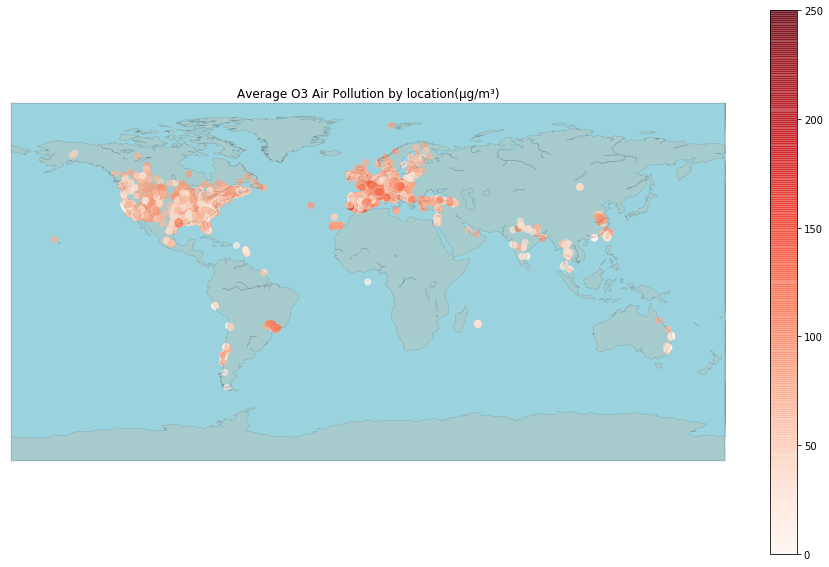

In [64]:
fig = plt.figure(figsize=(16,10))
bmap = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90,urcrnrlat=90,
                resolution='c', lat_ts=True)
bmap.shadedrelief()
bmap.drawmapboundary(fill_color='#9ad3de', linewidth=0.1)
bmap.fillcontinents(color='#daad86', alpha=0.2)
bmap.drawcoastlines(linewidth=0.1, color='#312c32')

bmap.scatter(o3_map['longitude'],o3_map['latitude'],c=o3_map['Average'],alpha=0.7,cmap='Reds', vmax=250)
plt.title('Average O3 Air Pollution by location(µg/m³)')
plt.colorbar()

**Sulfur dioxide (SO2)**  
[Source](http://www.environment.gov.au/protection/publications/factsheet-sulfur-dioxide-so2)  
Sulfur dioxide is a gas. It is invisible and has a nasty, sharp smell. It reacts easily with other substances to form harmful compounds, such as sulfuric acid, sulfurous acid and sulfate particles.

About 99% of the sulfur dioxide in air comes from human sources. The main source of sulfur dioxide in the air is industrial activity that processes materials that contain sulfur, eg the generation of electricity from coal, oil or gas that contains sulfur. Some mineral ores also contain sulfur, and sulfur dioxide is released when they are processed. In addition, industrial activities that burn fossil fuels containing sulfur can be important sources of sulfur dioxide.

Sulfur dioxide is also present in motor vehicle emissions, as the result of fuel combustion. In the past, motor vehicle exhaust was an important, but not the main, source of sulfur dioxide in air. However, this is no longer the case.


In [65]:
query = """
        SELECT AVG(value) as Average, unit, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'so2' and value > 0
        GROUP BY country, unit
        ORDER BY Average
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [66]:
so2_country_pollution = open_aq.query_to_pandas_safe(query)

In [67]:
so2_country_pollution

,Average,unit,country
0,0.000875,ppm,IL
1,0.001000,ppm,CA
2,0.001600,ppm,ZA
3,0.001868,ppm,TW
4,0.002178,ppm,US
5,0.002980,ppm,PE
6,0.003778,ppm,MX
7,0.013375,ppm,TH
8,0.202000,ppm,AU
9,0.570000,µg/m³,NL


In [68]:
print(so2_country_pollution[so2_country_pollution['country'].duplicated(keep=False)])

     Average   unit country
5    0.00298    ppm      PE
36  13.11200  µg/m³      PE


In [69]:
so2_country_pollution['Average'] = so2_country_pollution.apply(lambda x: gas_convertion(x['Average'], so2_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)
so2_country_pollution = so2_country_pollution.groupby('country', as_index=False).mean().sort_values(by='Average',axis=0)

Text(0.5,1,'Average SO2 air pollution by country(µg/m³)')

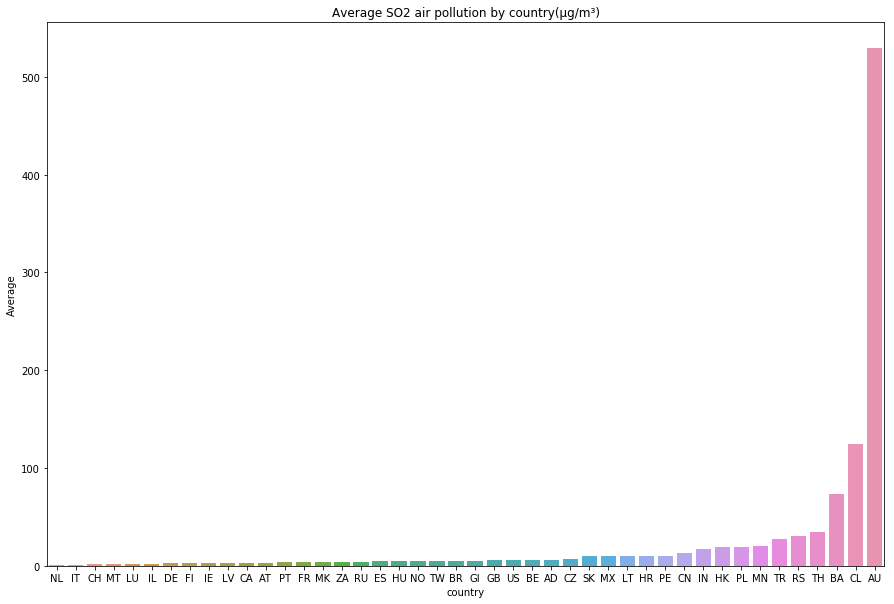

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y=so2_country_pollution['Average'],x=so2_country_pollution['country'])
plt.title('Average SO2 air pollution by country(µg/m³)')

Let's check Chile and Australia. 

In [71]:
query = """
        SELECT value, unit, pollutant, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'AU' and pollutant = 'so2' and value > 0
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [72]:
au_pollution = open_aq.query_to_pandas_safe(query)

In [73]:
au_pollution

,value,unit,pollutant,country
0,0.318,ppm,so2,AU
1,0.156,ppm,so2,AU
2,0.428,ppm,so2,AU
3,0.196,ppm,so2,AU
4,0.264,ppm,so2,AU
5,0.255,ppm,so2,AU
6,0.371,ppm,so2,AU
7,0.163,ppm,so2,AU
8,0.005,ppm,so2,AU
9,0.218,ppm,so2,AU


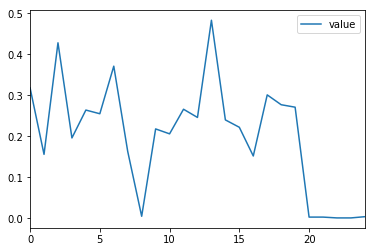

In [74]:
au_pollution.plot()

There is only one potential outlier. Data doesn't look totally wrong.

In [75]:
query = """
        SELECT value, unit, pollutant, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'CL' and pollutant = 'so2' and value > 0
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [76]:
cl_pollution = open_aq.query_to_pandas(query)

In [77]:
cl_pollution

,value,unit,pollutant,country
0,7.0000,µg/m³,so2,CL
1,12.0000,µg/m³,so2,CL
2,18.0000,µg/m³,so2,CL
3,8.0400,µg/m³,so2,CL
4,4.7800,µg/m³,so2,CL
5,16.1200,µg/m³,so2,CL
6,1.7000,µg/m³,so2,CL
7,1.9500,µg/m³,so2,CL
8,17.7000,µg/m³,so2,CL
9,2088.3500,µg/m³,so2,CL


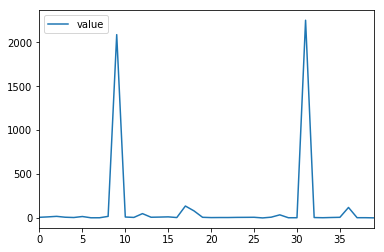

In [78]:
cl_pollution.plot()

We have some unreliable data about Chile.

In [79]:
query = """
        SELECT AVG(value) as Average, unit, city, latitude, longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'so2' and value >= 0
        GROUP BY city, unit, latitude, longitude
"""
open_aq.estimate_query_size(query)

0.0008367914706468582

In [80]:
so2_map = open_aq.query_to_pandas_safe(query)

In [81]:
so2_map['Average'] = so2_map.apply(lambda x: gas_convertion(x['Average'], so2_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)


In [82]:
outliers = so2_map[so2_map['Average'] > 1500]
outliers

,Average,unit,city,latitude,longitude
1003,2088.35,µg/m³,Hualpén,-36.780632,-73.115654
1364,2252.28,µg/m³,Concón,-32.924570,-71.515396


In [83]:
so2_map = so2_map.drop(so2_map.index[so2_map['Average'] > 700])

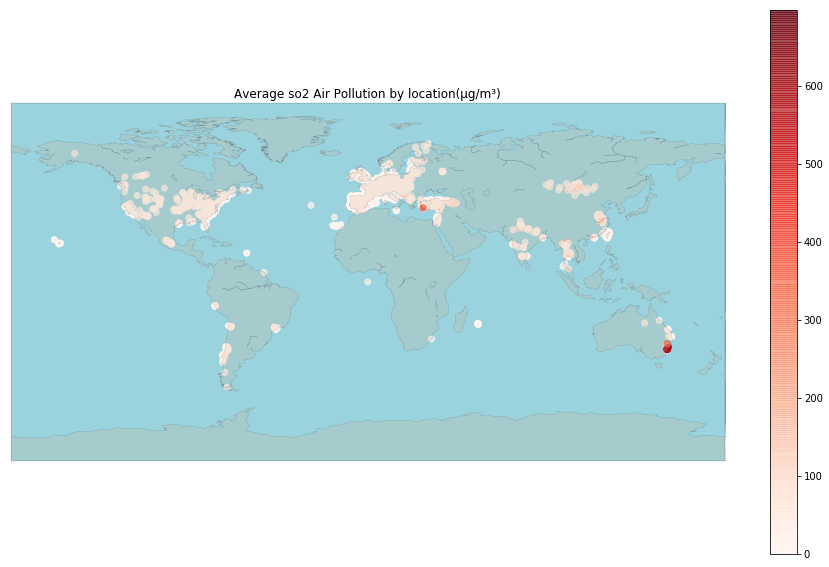

In [84]:
fig = plt.figure(figsize=(16,10))
bmap = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90,urcrnrlat=90,
                resolution='c', lat_ts=True)
bmap.shadedrelief()
bmap.drawmapboundary(fill_color='#9ad3de', linewidth=0.1)
bmap.fillcontinents(color='#daad86', alpha=0.2)
bmap.drawcoastlines(linewidth=0.1, color='#312c32')

bmap.scatter(so2_map['longitude'],so2_map['latitude'],c=so2_map['Average'],alpha=0.7,cmap='Reds')
plt.title('Average so2 Air Pollution by location(µg/m³)')
plt.colorbar()

**Carbon Monoxide (CO)**  
[Source](http://www.environment.gov.au/protection/publications/factsheet-carbon-monoxide-co)  
Carbon monoxide is a gas and is found in air. High levels of carbon monoxide are poisonous to humans and, unfortunately, it cannot be detected by humans as it has no taste or smell and cannot be seen.

The natural concentration of carbon monoxide in air is around 0.2 parts per million (ppm), and that amount is not harmful to humans. Natural sources of carbon monoxide include volcanoes and bushfires.

The main sources of additional carbon monoxide are motor vehicle exhaust and some industrial activities, such as making steel.

Tobacco smoke is one of the main indoor sources of carbon monoxide.


In [85]:
query = """
        SELECT AVG(value) as Average, unit, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'co' and value > 0
        GROUP BY country, unit
        ORDER BY Average
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [86]:
co_country_pollution = open_aq.query_to_pandas_safe(query)

In [87]:
co_country_pollution

,Average,unit,country
0,0.169231,ppm,AU
1,0.271741,µg/m³,IE
2,0.318000,ppm,CA
3,0.390052,ppm,US
4,0.410000,µg/m³,LV
5,0.421316,ppm,TW
6,0.514286,ppm,IL
7,0.585000,ppm,AR
8,0.709524,ppm,BR
9,0.953714,ppm,MX


In [88]:
co_country_pollution['Average'] = co_country_pollution.apply(lambda x: gas_convertion(x['Average'], co_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)


co_country_pollution = co_country_pollution.groupby('country', as_index=False).mean().sort_values(by='Average',axis=0)

Text(0.5,1,'Average CO air pollution by country(µg/m³)')

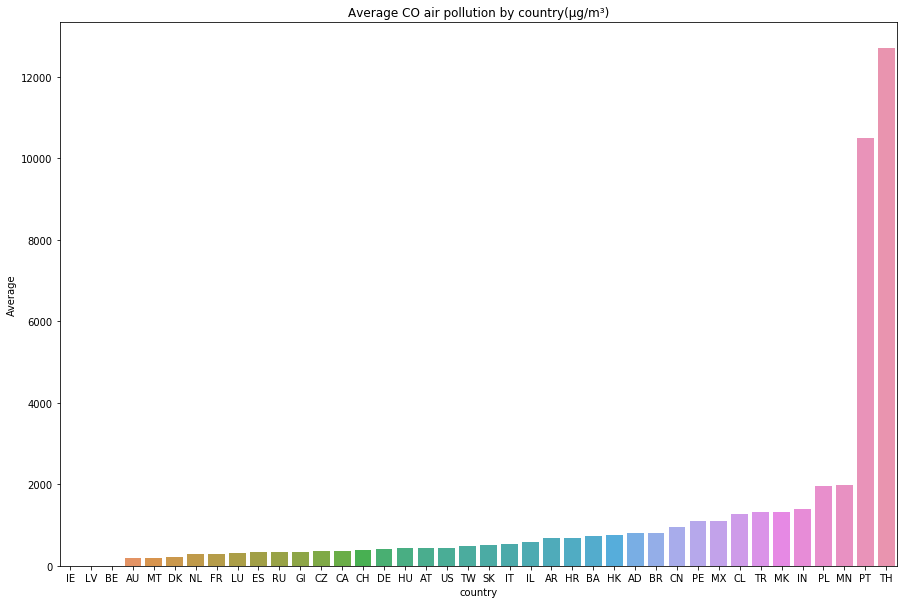

In [89]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y=co_country_pollution['Average'],x=co_country_pollution['country'])
plt.title('Average CO air pollution by country(µg/m³)')

Thailand and Portugal have suspiciously high values.

In [90]:
query = """
        SELECT value, unit, pollutant, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'TH' and pollutant = 'co'
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [91]:
thai_pollution = open_aq.query_to_pandas_safe(query)

In [92]:
thai_pollution

,value,unit,pollutant,country
0,0.00,ppm,co,TH
1,0.00,ppm,co,TH
2,0.00,ppm,co,TH
3,0.25,ppm,co,TH
4,0.50,ppm,co,TH
5,0.50,ppm,co,TH
6,0.50,ppm,co,TH
7,0.36,ppm,co,TH
8,1.19,ppm,co,TH
9,0.69,ppm,co,TH


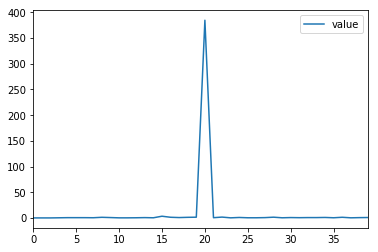

In [93]:
thai_pollution.plot()

Thailand CO pollution is not accurate due to wrong data.

In [94]:
query = """
        SELECT value, unit, pollutant, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'PT' and pollutant = 'co'
"""
open_aq.estimate_query_size(query)

0.0004035225138068199

In [95]:
portugal_pollution = open_aq.query_to_pandas_safe(query)

In [96]:
portugal_pollution

,value,unit,pollutant,country
0,100.0,µg/m³,co,PT
1,200.0,µg/m³,co,PT
2,200.0,µg/m³,co,PT
3,200.0,µg/m³,co,PT
4,400.0,µg/m³,co,PT
5,1600.0,µg/m³,co,PT
6,16400.0,µg/m³,co,PT
7,6700.0,µg/m³,co,PT
8,5700.0,µg/m³,co,PT
9,6500.0,µg/m³,co,PT


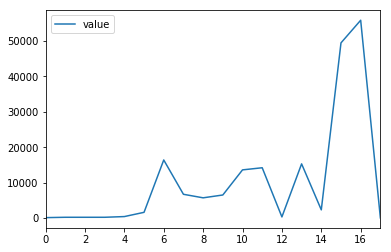

In [97]:
portugal_pollution.plot()

Data doesn't look reliable.

In [98]:
query = """
        SELECT AVG(value) as Average, unit, city, latitude, longitude
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE pollutant = 'co' and value >= 0
        GROUP BY city, unit, latitude, longitude
"""
open_aq.estimate_query_size(query)

0.0008367914706468582

In [99]:
co_map = open_aq.query_to_pandas_safe(query)

In [100]:
co_map['Average'] = co_map.apply(lambda x: gas_convertion(x['Average'], co_mol_weight)
                            if x['unit'] == 'ppm' else x['Average'], axis=1)

In [101]:
outliers = co_map[co_map['Average'] > 8000]
outliers

,Average,unit,city,latitude,longitude
182,16400.000000,µg/m³,Setúbal,38.020000,-8.697500
193,8238.000000,µg/m³,Muğla,37.311210,27.782932
386,14200.000000,µg/m³,Coimbra,40.214720,-8.401667
490,13698.500000,µg/m³,Cabrero,-37.068142,-72.289450
491,49500.000000,µg/m³,Aveiro,40.635555,-8.646667
492,55900.000000,µg/m³,Porto,41.164444,-8.589444
923,13600.000000,µg/m³,Lisboa,38.768890,-9.108056
925,15300.000000,µg/m³,Lisboa,38.802223,-9.182222
1001,440816.683027,ppm,Bangkok,13.775373,100.568930


In [102]:
co_map = co_map.drop(co_map.index[co_map['Average'] > 8000])

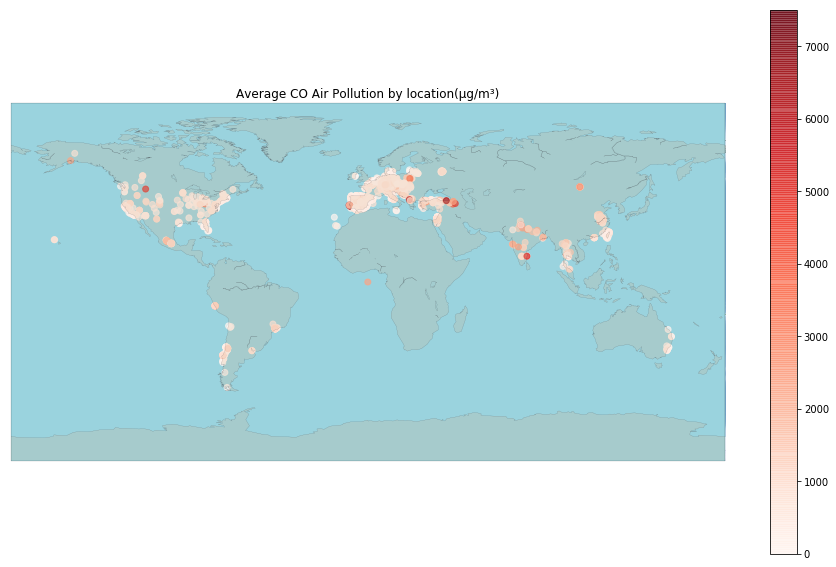

In [103]:
fig = plt.figure(figsize=(16,10))
bmap = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90,urcrnrlat=90,
                resolution='c', lat_ts=True)
bmap.shadedrelief()
bmap.drawmapboundary(fill_color='#9ad3de', linewidth=0.1)
bmap.fillcontinents(color='#daad86', alpha=0.2)
bmap.drawcoastlines(linewidth=0.1, color='#312c32')

bmap.scatter(co_map['longitude'],co_map['latitude'],c=co_map['Average'],alpha=0.7,cmap='Reds')
plt.title('Average CO Air Pollution by location(µg/m³)')
plt.colorbar()

# Conclusion  
Air quality and air pollution are tightly associated with health problems and health risks. In modern society, clean air is precious resource and commodity.  

OpenAQ dataset provides open-source data with measurements of different air pollutants. It doesn't contain historical data. Most of the entries are from the US and Europe. Dataset has some problems with wrong entries.

Thank You for Your time and attention.